1995年から2015年までの言語処理学会大会論文リスト anlp-jp-history.json を集計して

* 年ごとの投稿数
* 年ごとの共著数
* 年ごとの継続投稿者数（まだない）

のグラフを描くスクリプトです。

In [1]:
import six.moves.urllib.request as urlreq
from six.moves import xrange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import codecs
import re

f = codecs.getreader('utf-8')(urlreq.urlopen('http://files.figshare.com/2212988/anlp_jp_history.json'))
# f = codecs.getreader('utf-8')(open('../resource/anlp_jp_history.json'))
table = json.load(f)
for row in table:
    a = row['author_list'].replace(u'○', '')
    a = re.sub(r' *\(.*?\)', '', a)
    row['authors'] = re.split(u'[，,]', a)
    row['authors_num'] = len(row['authors'])
df = pd.DataFrame(table)
df[0:3]

,author_list,authors,authors_num,pid,title,url,year
0,○荒木哲郎 (福井大)，池原悟 (NTT)，横川秀人 (福井大),"[荒木哲郎, 池原悟, 横川秀人]",3,1995/A1-1,アクセント，ポーズ位置情報を用いた日本語音節文候補の絞り込み,http://www.anlp.jp/proceedings/annual_meeting/...,1995
1,○荒木哲郎 (福井大)，池原悟 (NTT)，四方啓智 (福井大),"[荒木哲郎, 池原悟, 四方啓智]",3,1995/A1-2,日本語音声会話文ラティスからのキーワード候補の抽出法,http://www.anlp.jp/proceedings/annual_meeting/...,1995
2,○白井諭，横尾昭男 (NTT)，木村淳子，小見佳恵 (NTTアドバンステクノロジ),"[白井諭, 横尾昭男, 木村淳子, 小見佳恵]",4,1995/A1-3,従属節の依存関係を考慮した日本語係り受け解析について,http://www.anlp.jp/proceedings/annual_meeting/...,1995


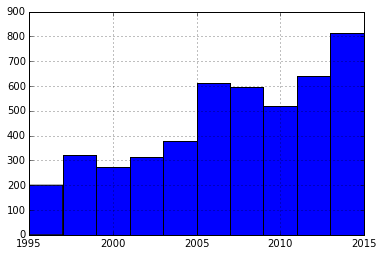

In [7]:
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline

df['year'].hist()

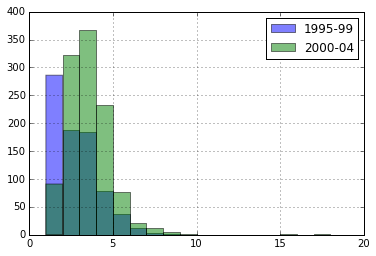

In [8]:
df[df['year'].between(1995, 2000)]['authors_num'].hist(bins=xrange(1,20), alpha=0.5, label='1995-99')
df[df['year'].between(2000, 2005)]['authors_num'].hist(bins=xrange(1,20), alpha=0.5, label='2000-04')
plt.legend(loc='upper right')

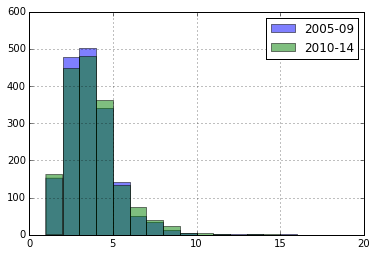

In [9]:
df[df['year'].between(2005, 2010)]['authors_num'].hist(bins=xrange(1,20), alpha=0.5, label='2005-09')
df[df['year'].between(2010, 2015)]['authors_num'].hist(bins=xrange(1,20), alpha=0.5, label='2010-14')
plt.legend(loc='upper right')